In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

Tue Feb  2 17:54:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import numpy as np # For some numeric calculations
import pandas as pd # To convert into pandas dataframe
import matplotlib.pyplot as plt # For visualization
import seaborn as sns # For visulaization
import warnings # To remove warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Health App/diabetes.csv")

In [5]:
df.head() # Seeing the top dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape #Seeing the size, features 

(768, 9)

In [7]:
df.isnull().sum() # Seeing the null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.info() # To see the info about datatypes, size and etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe().T # To see the data statistically

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# ***Exploratory Data Analysis***

<Figure size 1800x1800 with 0 Axes>

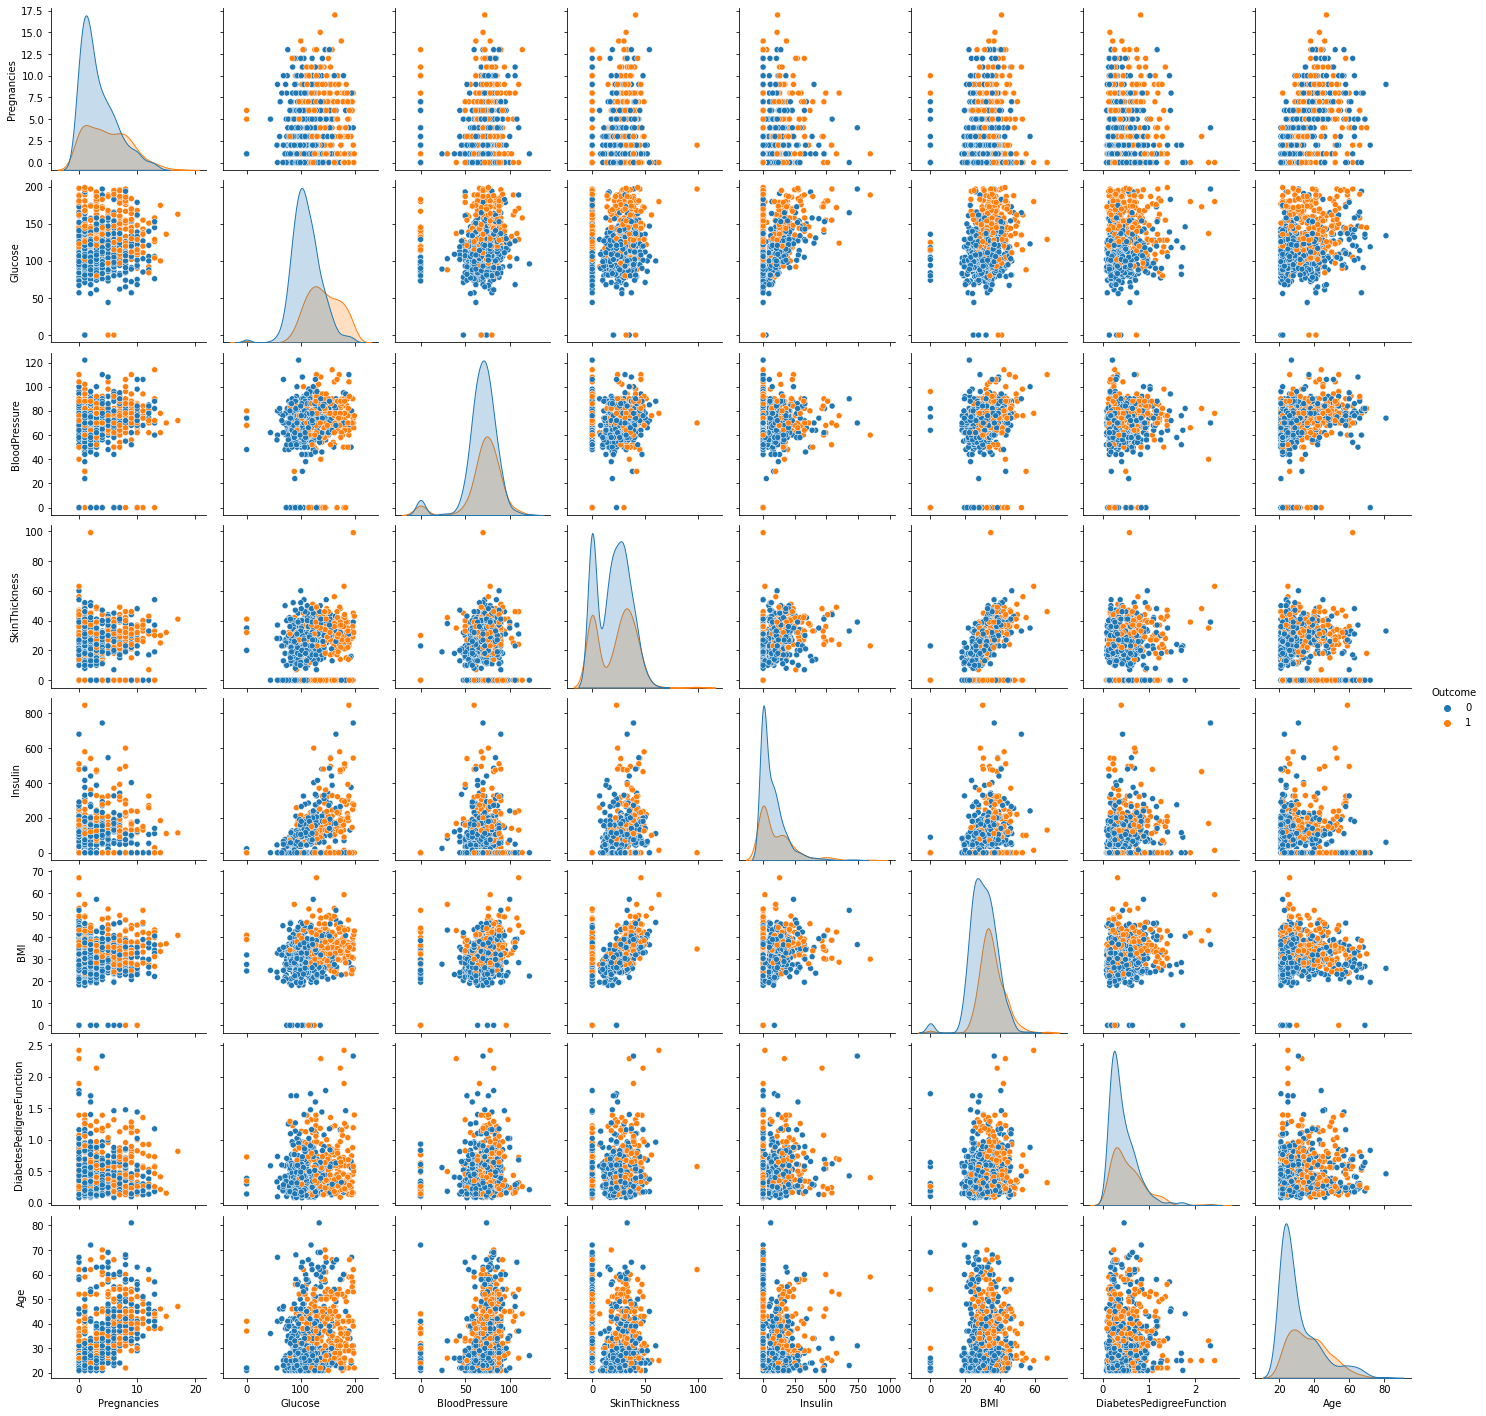

In [10]:
plt.figure(figsize=(25,25))
sns.pairplot(df,hue='Outcome') # Plotting the pairplot with the hue for outcome feature

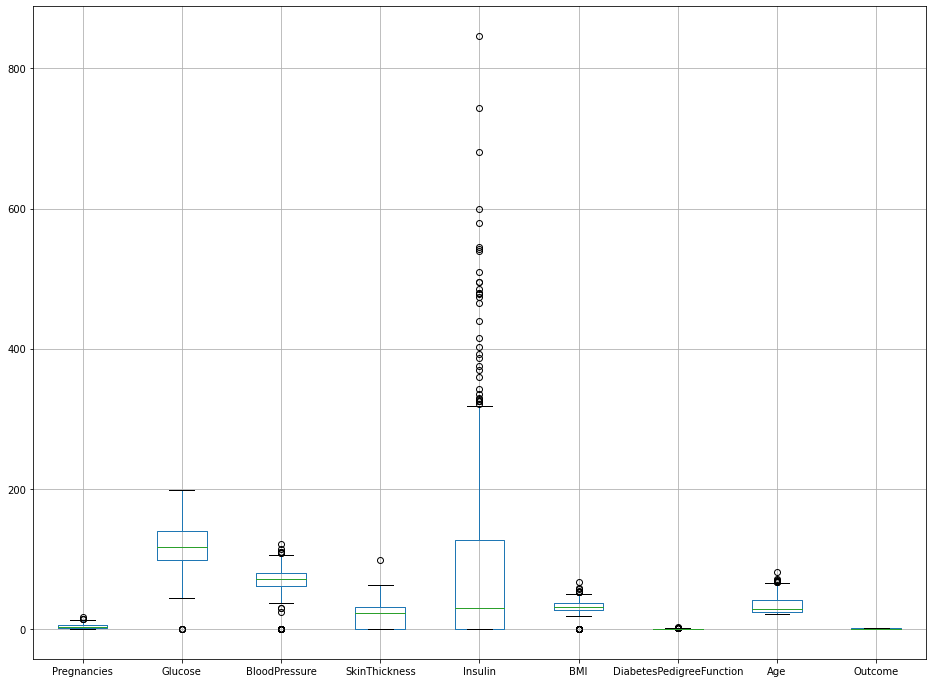

In [11]:
plt.figure(figsize=(16,12))
df.boxplot() # Plotting boxplot to see the outliers

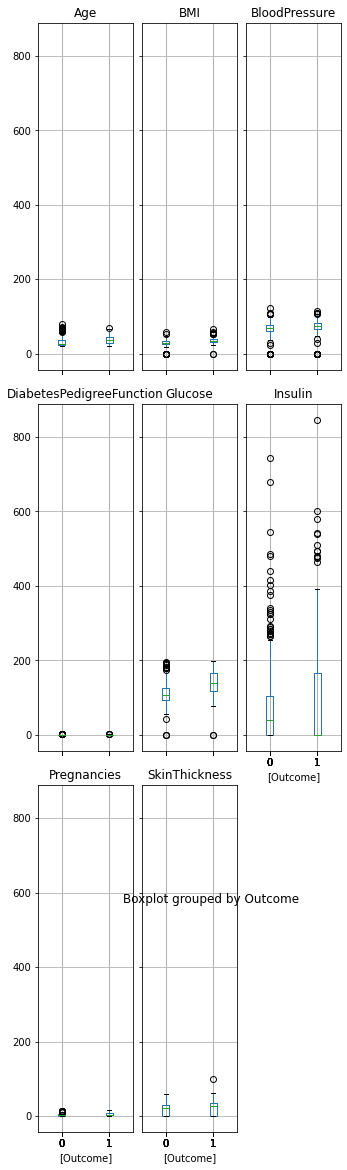

In [12]:
df.boxplot(by='Outcome') # Plotting boxplot with groping of the dependent feature 'Outcome' to see the outliers
plt.subplots_adjust(wspace=0.1,hspace=0.1,right=0.8,top=4)

In [13]:
df.Outcome.value_counts() # Seeing the value counts

0    500
1    268
Name: Outcome, dtype: int64

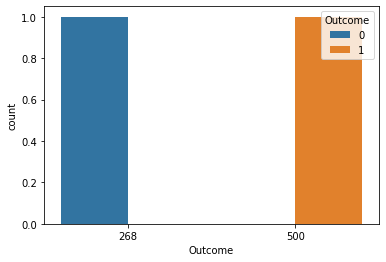

In [14]:
sns.countplot(df.Outcome.value_counts(),hue=df['Outcome']) # Seeing the value counts for Outcome

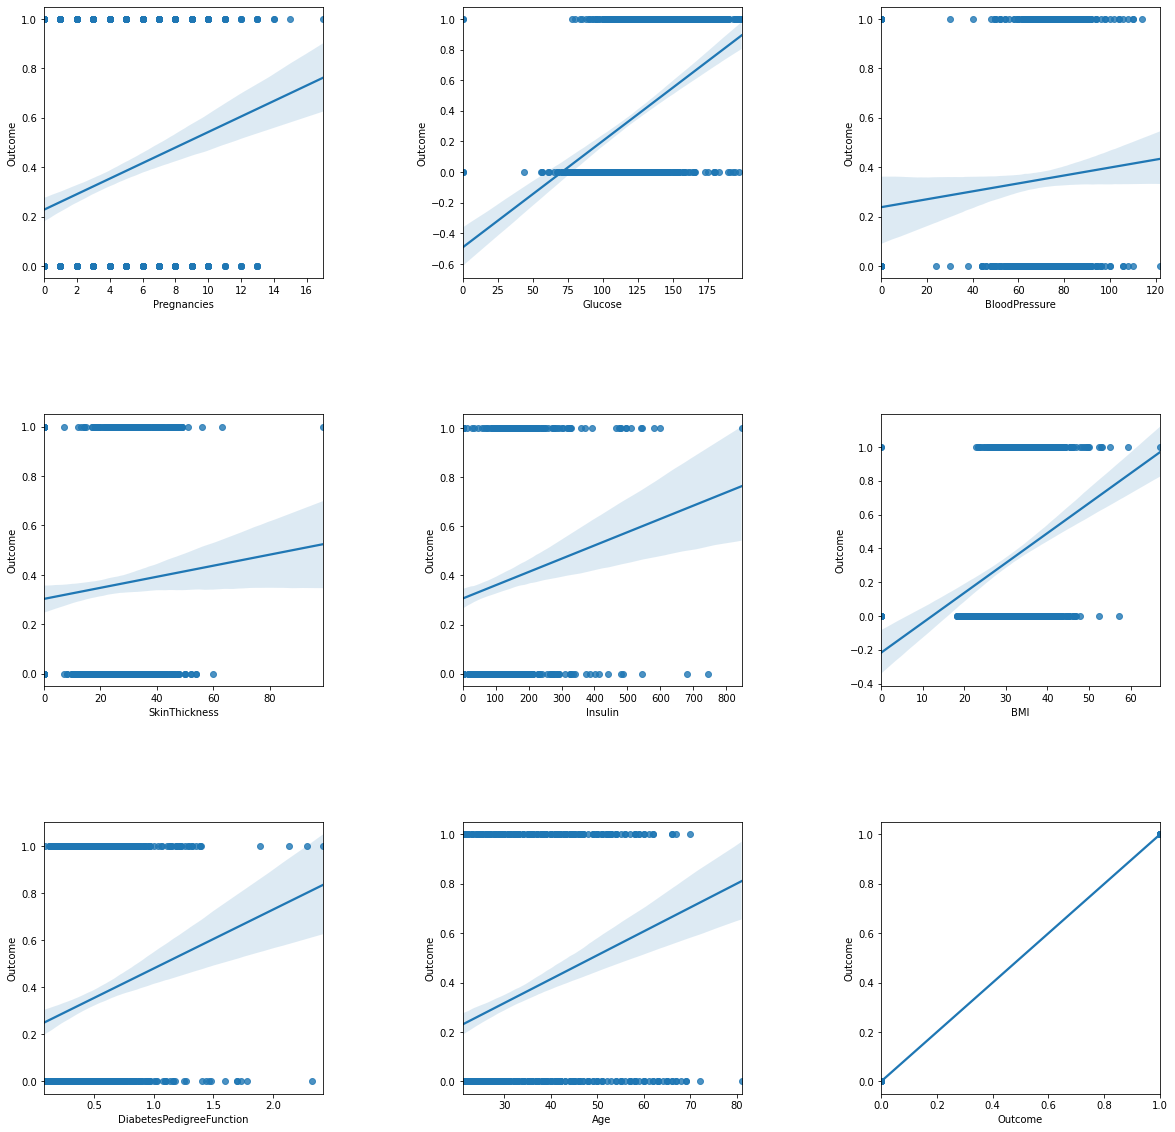

In [15]:
plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
  plt.subplot(3,3,i+1)
  plt.subplots_adjust(wspace=0.5,hspace=0.5)
  sns.regplot(x=df[col],y=df.Outcome) # Plotting regplot to see the linear structure of data for linear models

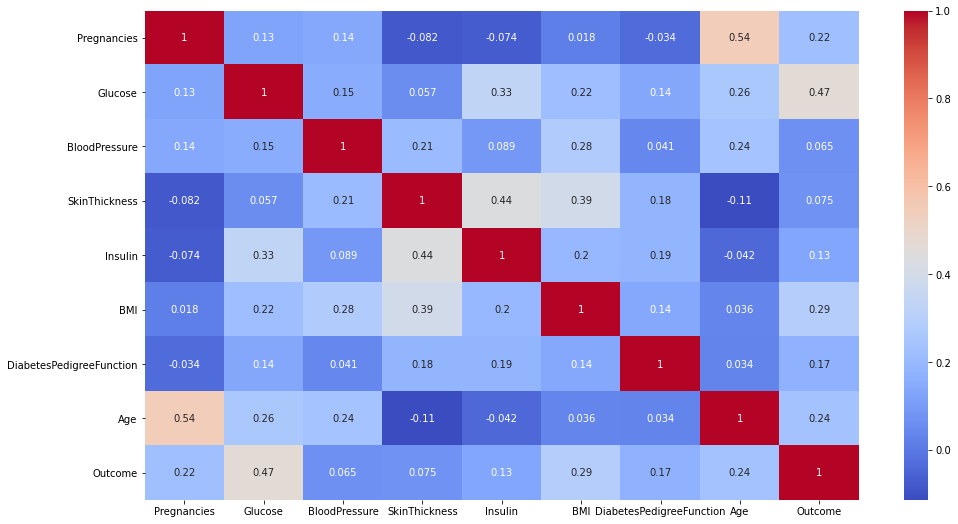

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm') # plotting the heatmap with correlation of the features 

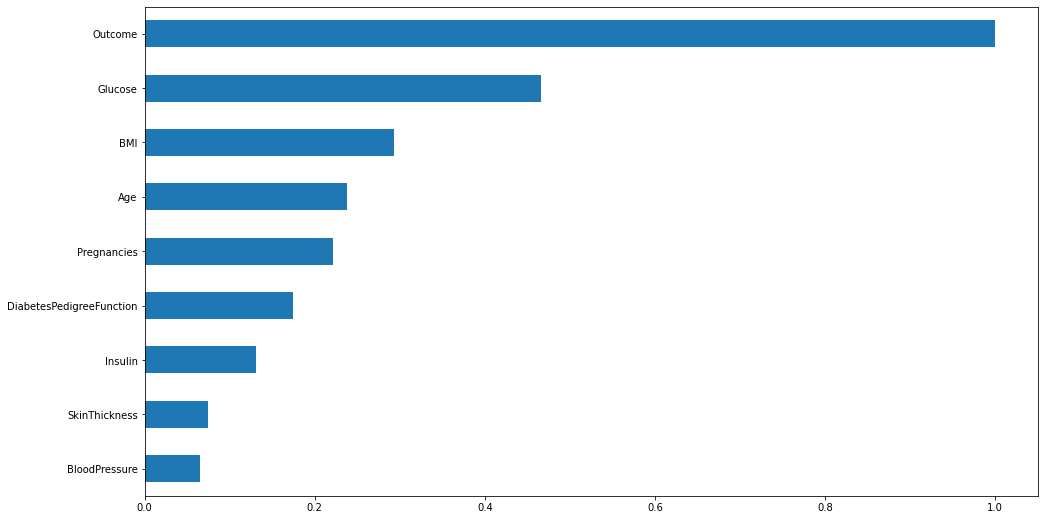

In [17]:
plt.figure(figsize=(16,9))
df.corrwith(df['Outcome']).sort_values(ascending=True).plot.barh() # Ploting the bar graph with Outcome feature

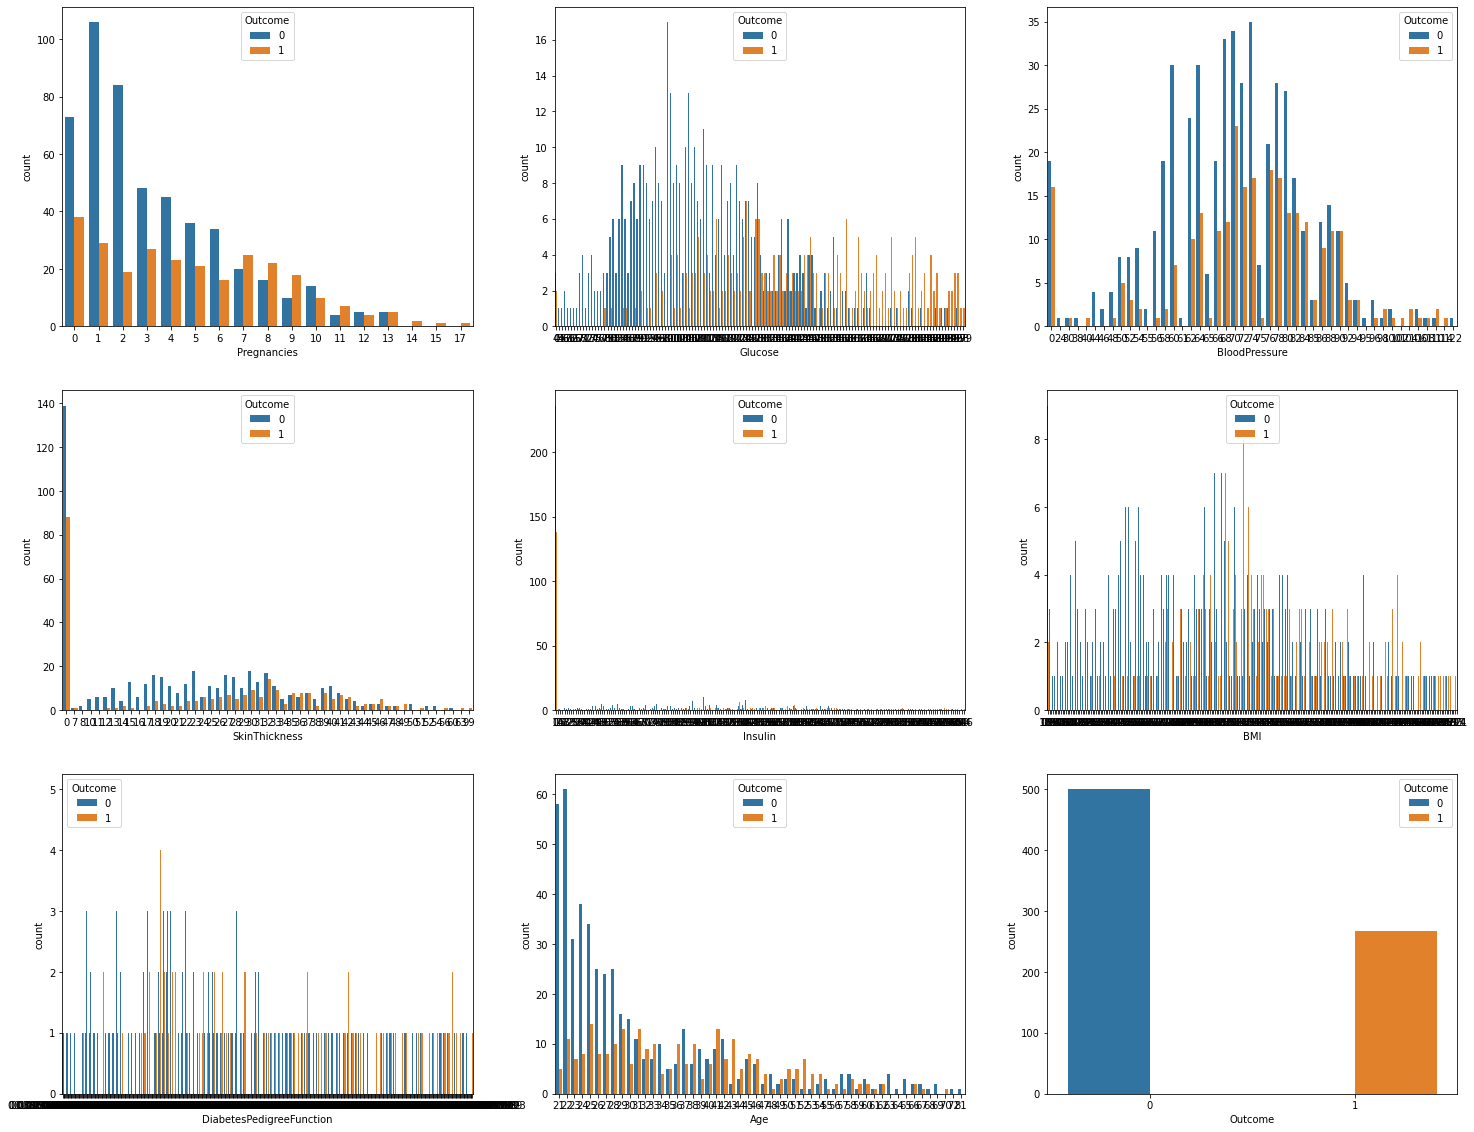

In [18]:
# Ploting the counter plot of every feature with the dependent feature
plt.figure(figsize=(25,20))
for i,col in enumerate(df.columns):
  plt.subplot(3,3,i+1)
  sns.countplot(df[col],hue=df['Outcome'])

# ***Model Bilding***

In [19]:
X=df.drop(['Outcome'],axis=1).copy() # Converting into X and Y labels
y=df['Outcome'].copy()

In [20]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [21]:
# rb=RobustScaler()
# X=rb.fit_transform(X)
# ss=StandardScaler() # We don't need this
# X=ss.fit_transform(X)

In [22]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.33)

In [25]:
from sklearn.linear_model import LogisticRegression # Importing the LogisticRegression to built a model

In [26]:
lr=LogisticRegression() # initializing the LogicticeRegression model
lr.fit(x_train,y_train) # fiittng the model
lr.predict(x_test) # predict the x_train
lr.score(x_test,y_test) # Seeing the accuracy of the model by providing x_test and y_test labels

0.7480314960629921

In [27]:
from sklearn.svm import SVC # Importing the SVC to built a model

In [28]:
sv=SVC() # initializing the SVC model
sv.fit(x_train,y_train) # fiittng the model
sv.predict(x_test) # predict the x_train
sv.score(x_test,y_test) # Seeing the accuracy of the model by providing x_test and y_test labels


0.7440944881889764

In [29]:
from sklearn.ensemble import RandomForestClassifier # Importing the RandomForestClassifier to built a model

In [30]:
rf=RandomForestClassifier() # initializing the RandomForestClassifier model
rf.fit(x_train,y_train) # fiittng the model
rf.predict(x_test) # predict the x_train
rf.score(x_test,y_test) # Seeing the accuracy of the model by providing x_test and y_test labels

0.7637795275590551

In [31]:
from sklearn.ensemble import AdaBoostClassifier # Importing the AdaBoostClassifier to built a model

In [32]:
ab=AdaBoostClassifier() # initializing the AdaBoostClassifier model
ab.fit(x_train,y_train) # fiittng the model
ab.predict(x_test) # predict the x_train
ab.score(x_test,y_test) # Seeing the accuracy of the model by providing x_test and y_test labels

0.7559055118110236

In [33]:
from sklearn.ensemble import GradientBoostingClassifier # Importing the GradientBoostingClassifier to built a model

In [34]:
gb=GradientBoostingClassifier() # initializing the GradientBoostingClassifier model
gb.fit(x_train,y_train) # fiittng the model
gb.predict(x_test) # predict the x_train
gb.score(x_test,y_test) # Seeing the accuracy of the model by providing x_test and y_test labels

0.7283464566929134

In [35]:
import xgboost # Importing the xgboost to built a model

In [36]:
xg=xgboost.XGBClassifier() # initializing the xgboost model
xg.fit(x_train,y_train) # fiittng the model
xg.predict(x_test) # predict the x_train
xg.score(x_test,y_test) # Seeing the accuracy of the model by providing x_test and y_test labels

0.7401574803149606

# **Feature Selection to increase the accuracy**
* Althoug there is very low feature but still I want to see the behaviour by droping these columns

In [37]:
from sklearn.feature_selection import SelectFromModel # For feature Selection
from sklearn.linear_model import Lasso # Import Lasso as feature Selection model

In [38]:
sel_features=SelectFromModel(Lasso(alpha=0.005))  # Initialize SelectFromModel along Lasso with 0.005 alpha values

In [39]:
sel_features.fit(x_train,y_train) # Fiting the model

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [40]:
X.columns[sel_features.get_support()] # To see what colums Lasso choose

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [41]:
ab=AdaBoostClassifier() # initializing the AdaBoostClassifier model
ab.fit(x_train[X.columns[sel_features.get_support()]],y_train) # fiittng the model
ab.predict(x_test) # predict the x_train
ab.score(x_test[X.columns[sel_features.get_support()]],y_test) # Seeing the accuracy of the model by providing x_test and y_test labels and by features given by the Lasso

0.7559055118110236

# **Hyperparameter Tuning to increase the accuracy of thw model**

In [42]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
} # Parameters foe the tunning

In [43]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV # Hyperparameter models

In [44]:
xg_grid=GridSearchCV(xg,params,cv=5,n_jobs=-1,verbose=3) #initialize GridSearchCV with the params
xg_grid.fit(x_train,y_train) # Fiting the x_train,y_train
xg_grid.score(x_test,y_test) # calculating the score for x_test,y_test

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 7696 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 9168 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 10768 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 12496 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 14352 tasks     

0.7637795275590551

In [45]:
xg_random=RandomizedSearchCV(xg,params,cv=5,n_jobs=-1,verbose=3) #initialize RandomizedSearchCV with the params
xg_random.fit(x_train,y_train) # Fiting the x_train,y_train
xg_random.score(x_test,y_test) # calculating the score for x_test,y_test

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished


0.7362204724409449

In [59]:
from sklearn.tree import DecisionTreeClassifier
ada=AdaBoostClassifier()
params={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
abc_grid=GridSearchCV(estimator=ada,param_grid=params,n_jobs=1,cv=5,verbose=3)
abc_grid.fit(x_train,y_train) # Fiting the x_train,y_train
abc_grid.score(x_test,y_test) # calculating the score for x_test,y_test

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] learning_rate=0.001, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.001, n_estimators=500, score=0.806, total=   1.0s
[CV] learning_rate=0.001, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  learning_rate=0.001, n_estimators=500, score=0.680, total=   1.0s
[CV] learning_rate=0.001, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV]  learning_rate=0.001, n_estimators=500, score=0.806, total=   0.9s
[CV] learning_rate=0.001, n_estimators=500 ...........................
[CV]  learning_rate=0.001, n_estimators=500, score=0.699, total=   1.0s
[CV] learning_rate=0.001, n_estimators=500 ...........................
[CV]  learning_rate=0.001, n_estimators=500, score=0.755, total=   0.9s
[CV] learning_rate=0.001, n_estimators=1000 ..........................
[CV]  learning_rate=0.001, n_estimators=1000, score=0.806, total=   1.9s
[CV] learning_rate=0.001, n_estimators=1000 ..........................
[CV]  learning_rate=0.001, n_estimators=1000, score=0.689, total=   1.9s
[CV] learning_rate=0.001, n_estimators=1000 ..........................
[CV]  learning_rate=0.001, n_estimators=1000, score=0.806, total=   1.9s
[CV] learning_rate=0.001, n_estimators=1000 ..........................
[CV]  learning_rate=0.001, n_estimators=1000, score=0.699, total=   1.9s
[CV] learning_rate=0.001, n_estimators=1000 ......................

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.7min finished


0.7598425196850394

In [62]:
ada=AdaBoostClassifier(learning_rate=0.01, n_estimators=500,)
ada.fit(x_train,y_train) # Fiting the x_train,y_train
ada.score(x_test,y_test) # calculating the score for x_test,y_test

0.7598425196850394

In [61]:
ab_random=RandomizedSearchCV(ada,params,cv=5,n_jobs=-1,verbose=3) #initialize RandomizedSearchCV with the params
ab_random.fit(x_train,y_train) # Fiting the x_train,y_train
ab_random.score(x_test,y_test) # calculating the score for x_test,y_test

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   41.7s finished


0.7598425196850394

# Xgboost classifier with the hyperparameter tuning is the best one with 76 % accuracy

In [64]:
xg_grid.best_estimator_ # Best Estemeters for XGboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [65]:
xg=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) # initializing the xgboost model with the hyperparameters
xg.fit(x_train,y_train) # fiittng the model
xg.predict(x_test) # predict the x_train
xg.score(x_test,y_test) # Seeing the accuracy of the model by providing x_test and y_test labels

0.7637795275590551

# Now, it's time to save the model

In [68]:
import pickle  ## Import Pickle to save the model
  
filename = '/content/drive/MyDrive/Health App/Model/diabetes_xg_0.76_model.sav' #specifying the path to save the model
pickle.dump(xg, open(filename, 'wb')) # Finally dump the model